In [1]:
# python 2/3 compatibility
from __future__ import print_function
# numerical python
import numpy as np
# file management tools
import glob
import os
# good module for timing tests
import time
# plotting stuff
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# ability to read/write fits files
from astropy.io import fits
# fancy image combination technique
from astropy.stats import sigma_clip
from astropy.stats import SigmaClip
# median absolute deviation: for photometry
from astropy.stats import mad_std
# photometric utilities
from photutils import DAOStarFinder, aperture_photometry, CircularAperture, CircularAnnulus, Background2D, MedianBackground
# periodograms
from astropy.stats import LombScargle
from regions import read_ds9#, write_ds9
from astropy.wcs import WCS
from astropy.stats import sigma_clipped_stats

import numpy.ma as ma
import warnings
import pandas as pd

warnings.filterwarnings("ignore")

np.set_printoptions(suppress=True)

In [2]:
from Sarah_DiffPhotometry import *
from importlib import reload as reload

## Initial setup: 

You will need to define the data directory where your images exist, and ideally a region file that you have created for the target members in your field.

**For the in-class example with WASP-12, there's only one target of interest so we will not use a regions file.**

In [3]:
datadir = '/Users/sarah/Downloads/WASP-12b/'

im = glob.glob(datadir+ '*.fits')

# For WASP-12 data
target = "WASP12"
wcs_image = im[0]


# # For your own data, modify as needed
# target = 'your target name, or other convention'
# wcs_image = '/Volumes/ARCTURUS/WIYN09/RegionFiles/' + target+ '/' + target + '_WCS.fits'
# wcs_region = '/Volumes/ARCTURUS/WIYN09/RegionFiles/' + target + '/' + target + '_VZ_sm.reg'

In [4]:
print(f"Number of images found: {len(im)}")

Number of images found: 230


In [5]:
aprad=30.  # aperture radius for WASP-12 with larger FWHM
skybuff=14.  # sky annulus inner radius
skywidth=18.  # sky annulus outer radius

In [6]:
# sensitivities for star finding
nsigma=10. # detection threshold in sigma (decrease for HDI data)
FWHM=8. # pixels (decrease for HDI data)

In [7]:
## do starfind on one of the images.
xpos, ypos, nstars = StarFind(im[3], FWHM, nsigma, aprad, skywidth)

begin: DAOStarFinder
found 149 stars


In [8]:
#find ra, dec coordinates of stars
hdr_wcs = fits.getheader(wcs_image)
w = construct_astrometry(hdr_wcs)
ra, dec = w.wcs_pix2world(xpos, ypos,1)

Found 230 images
making apertures


<IPython.core.display.Javascript object>


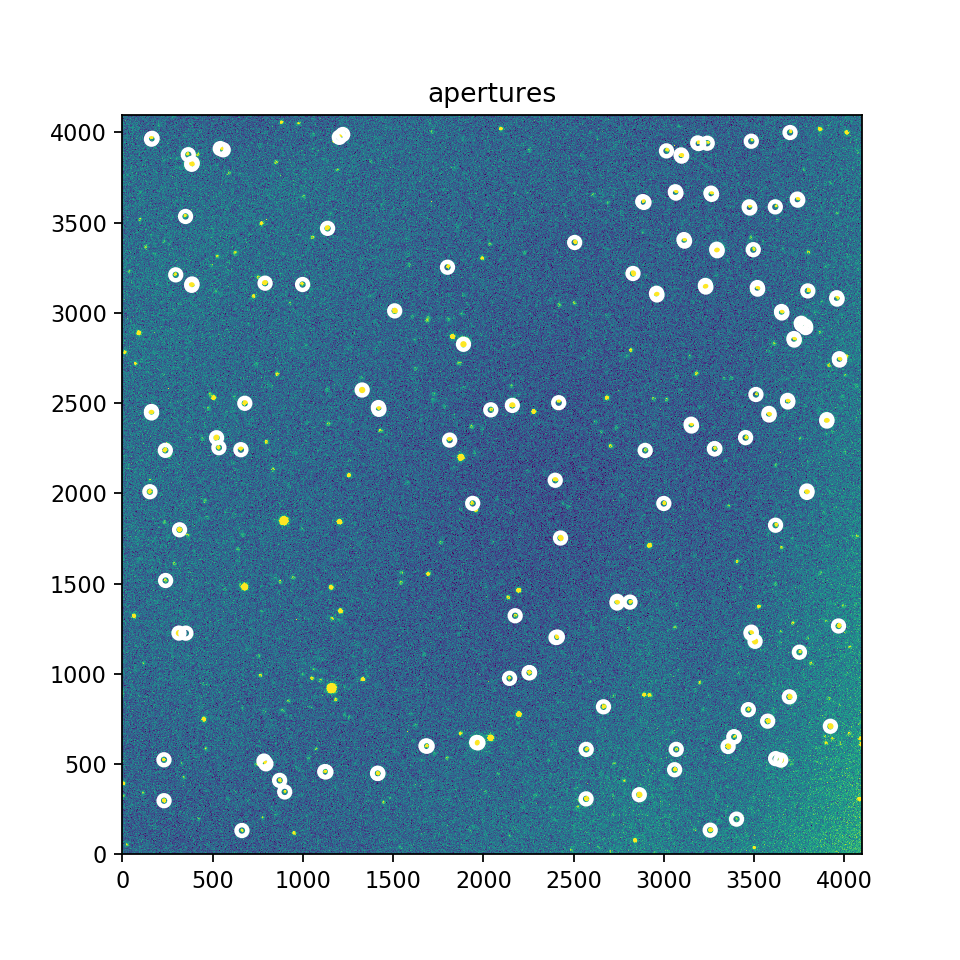

running aperture photometry on image:  0
running aperture photometry on image:  25
running aperture photometry on image:  51
running aperture photometry on image:  76
running aperture photometry on image:  102
running aperture photometry on image:  127
running aperture photometry on image:  153
running aperture photometry on image:  178
running aperture photometry on image:  204


In [9]:
# Note that you will need to update the "timekey" keyword to pick the right header keyword from AIJ! 

times, Photometry_initial = doPhotometry(im, xpos, ypos,aprad, skybuff, skywidth, timekey='JD_UTC')

In [10]:
ePhotometry = doPhotometryError(im,xpos, ypos, aprad, skybuff, skywidth, Photometry_initial, manual=True, xboxcorner=2000, yboxcorner=2000, boxsize=200)



Found 230 images
running error analysis on image  0
Scatter in sky values:  1880.70724597627 , uncertainty in mean sky brightness:  500.0200200834821
running error analysis on image  25
Scatter in sky values:  2182.434782816262 , uncertainty in mean sky brightness:  580.2397402729241
running error analysis on image  51
Scatter in sky values:  1783.0993627647756 , uncertainty in mean sky brightness:  474.0691998119397
running error analysis on image  76
Scatter in sky values:  1924.988726449576 , uncertainty in mean sky brightness:  511.7930521717884
running error analysis on image  102
Scatter in sky values:  1922.4582932157437 , uncertainty in mean sky brightness:  511.12029075232357
running error analysis on image  127
Scatter in sky values:  1672.4088545231743 , uncertainty in mean sky brightness:  444.64012717321253
running error analysis on image  153
Scatter in sky values:  1844.6739553831555 , uncertainty in mean sky brightness:  490.4399183825976
running error analysis on image

In [11]:
#find ra, dec coordinates of stars
hdr_wcs = fits.getheader(wcs_image)
w = construct_astrometry(hdr_wcs)
ra, dec = w.wcs_pix2world(xpos, ypos,1)

# wcs_region=([2402],[2076])

# memberlist = wcs_region

ra_in, dec_in = w.wcs_pix2world([2402],[2076],1)
memberlist = (ra_in, dec_in)


idx, RA, DEC = target_list(memberlist, ra, dec)

In [12]:
Photometry, cPhotometry = detrend(Photometry_initial, ePhotometry, nstars)


starting detrending on star number  0 / 149
median photometry on star 0: 113792.14859469305
starting detrending on star number  16 / 149
median photometry on star 16: 135860.8655556303
starting detrending on star number  33 / 149
median photometry on star 33: 219892.53454572358
starting detrending on star number  49 / 149
median photometry on star 49: 725146.315618275
starting detrending on star number  66 / 149
median photometry on star 66: 173857.13875111868
starting detrending on star number  82 / 149
median photometry on star 82: 503697.78894010256
starting detrending on star number  99 / 149
median photometry on star 99: 2808855.543535512
starting detrending on star number  115 / 149
median photometry on star 115: 8550168.698786102
starting detrending on star number  132 / 149
median photometry on star 132: 4392515.195190188
(array([], dtype=int64),)


<IPython.core.display.Javascript object>


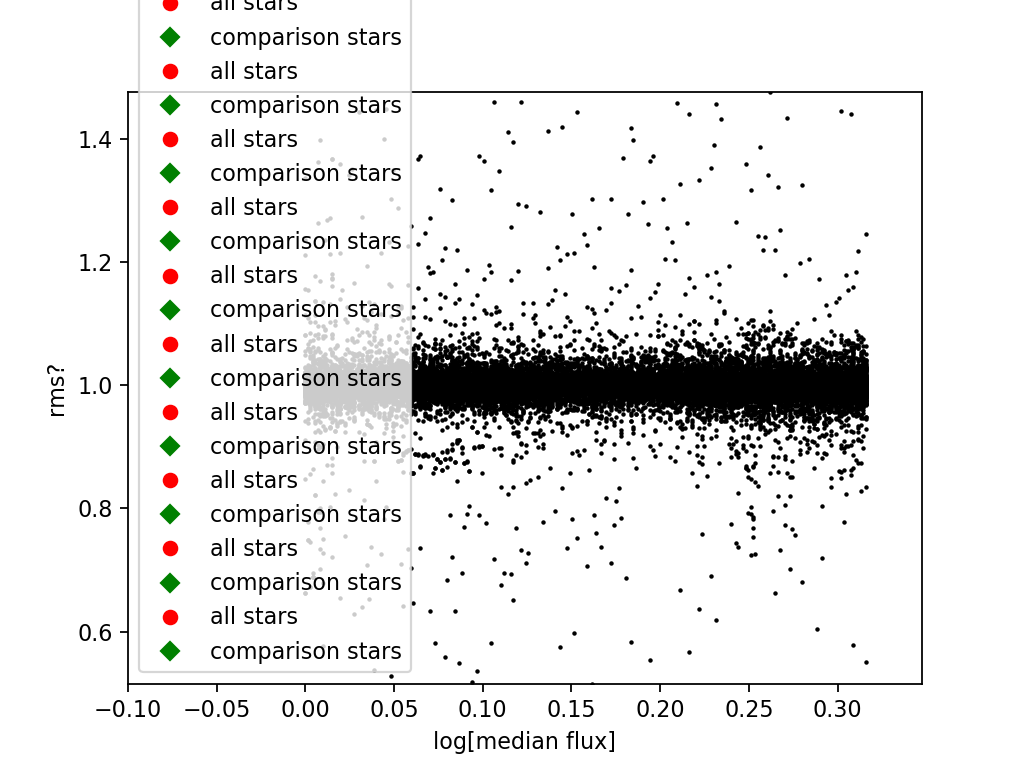

In [13]:
plotPhotometry(times,cPhotometry)


number of stars: 230
number of nights: 149
[1909.26239285 1956.14996281 1897.68045954 1944.7943533  1944.38014424
 2059.704305   1906.47950942 1916.82053142 1921.70733949 1922.12051184
 1910.82517287 1910.41808657 1926.2866401  1971.49518158 1963.89713537
 2040.95262446 1914.4525399  1945.99742945 1922.26426311 1909.38997188
 1917.2543796  2050.36519263 1917.00507886 4942.76996921 4937.26245477
 1907.92708314 1907.56037692 2043.09939706 1970.97559705 1913.37273135
 1935.7547319  1977.35551118 1911.67381787 1929.98049665 1930.23691842
 1908.83414313 2484.67560073 1940.98600766 1941.19407883 1968.71134525
 1941.51547833 2256.45530726 1967.55286089 1940.15512252 1911.30651623
 2096.23205805 1923.16861516 2096.50887102 1905.09221612 2029.856822
 1962.53930115 1917.966698   1914.01474619 1923.49861804 2155.10584029
 1939.91385663 2155.19625035 2125.49752924 1909.86682401 1946.72927984
 1974.71816752 1916.43807923 1916.09790489 1921.19451455 2057.38321954
 2031.30627633 1920.84187964 1945.80

<IPython.core.display.Javascript object>


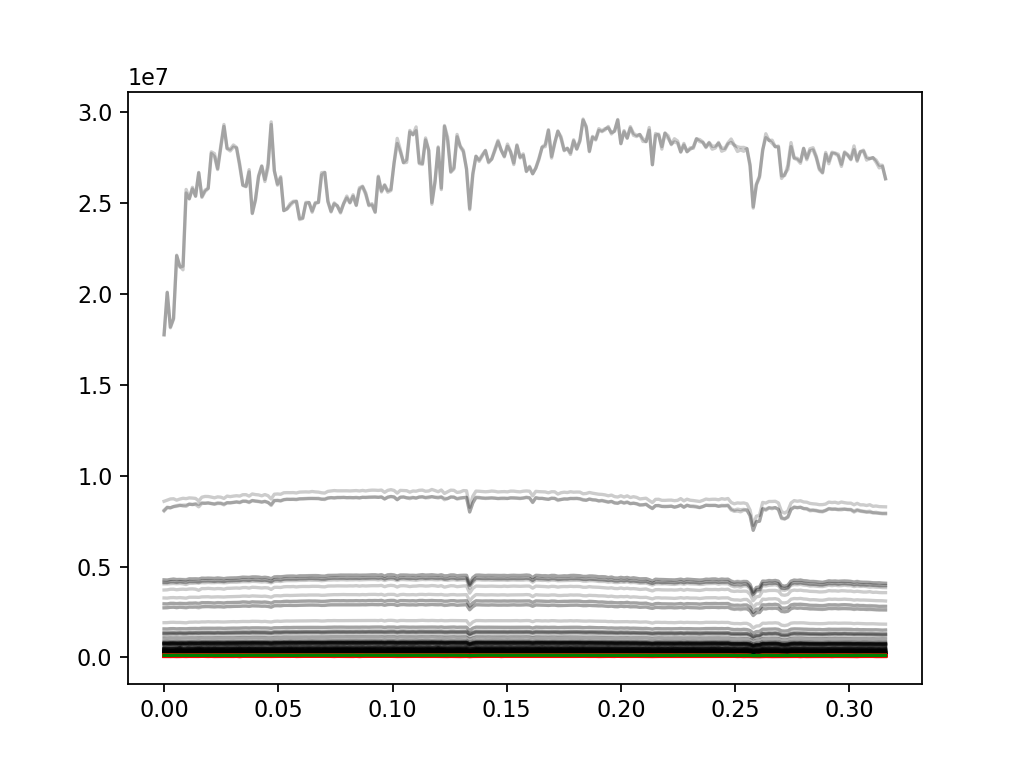

In [176]:
# Photometry
# 0. select sample whose std of error is less than 10% of all errors
# transpose it so every row is a star and every column is a different date
# 89 stars and 230 times

Photometry2 = Photometry.transpose()
ePhotometry2 = ePhotometry.transpose()

print('number of stars:', np.shape(Photometry)[0])
print('number of nights:', np.shape(Photometry)[1])

# take the median of the error of all days for each star
median_ePhot = np.median(ePhotometry2, axis=1) #np.max(Photometry2, axis=1) - np.min(Photometry2, axis=1)
print(median_ePhot)
# order them from smallest error to largest
ind = np.argsort(median_ePhot)
print('number of median errors over all night: ', median_ePhot.shape)
sort_err = median_ePhot[ind]
# find the error at 10%
#### CHANGE 0.1 TO WHATEVER PERCENTAGE OF ERROR YOU WANT!
percent10 = sort_err[int(0.1*len(sort_err))]
# find all stars with errors less than the 10 percent error
ref = np.where(median_ePhot <= percent10)
# create a mask of reference stars as 1 and all other as 0 so you can 
# find the index number of the final comparision stars 
initial_ref_stars = np.zeros_like(median_ePhot)
initial_ref_stars[ref] = 1.
print('ref stars:', ref)
print('--------------------')
# get photometry of the reference star sample
test_stars = Photometry2[ref[0],:]

# print('number of test stars:', test_stars.shape)

# go through Scholtz+2003 steps
# 1. average flux for each star
FF = np.nanmean(test_stars, axis=1)
print(FF[0])

# #2 subtract average from every value of time series for every star
flux0 = (test_stars.transpose() - FF).transpose()
print(flux0.shape)


# 3 calculate average flux0 and standard dev for all stars at each time
mean_flux0 = np.nanmean(flux0, axis=0)
print(mean_flux0.shape)

std_flux0 = np.sqrt((1./(len(test_stars)-1)) * np.sum([(flux0[i,:] - mean_flux0[:])**2. 
                                                       for i in np.arange(len(test_stars))], axis=0))
print(std_flux0.shape)


# #6. calculate quality number test : examine intrinsic variability compared to other reference stars 
test = abs((flux0 - mean_flux0)) >= std_flux0
test = test * 1.

print(abs((flux0 - mean_flux0))[0,0:4])

tot_test = np.sum(test,axis=1)
print('quality test for test stars: ' , tot_test)


# stars with test < 3 are selected as reference stars 
ind = np.where(tot_test < 3)

# pull out original index of comparison stars 
comparison_star_index = ref[0][ind[0]]
print('comparison stars: ', comparison_star_index)



# calculate rms?
rms = np.std(Photometry2, axis=1)

# # plot flux vs rms 
# plt.figure()
# plt.plot(np.log10(np.median(Photometry2, axis=1)), np.log10(rms), 'ro', label='all stars')
# plt.plot(np.log10(np.median(Photometry2, axis=1)[comparison_star_index]), np.log10(rms[comparison_star_index]), 'gD'
#         , label='comparison stars')
# plt.xlabel('log[median flux]')
# plt.ylabel('rms?')
# plt.legend()
# plt.show()

plt.figure()
# for ii in comparison_star_index:
#     plt.plot(times-np.nanmin(times), Photometry2[ii], 'o')
    

inf = np.argsort(times-np.nanmin(times))


for kk in np.arange(len(Photometry2)):  
    plt.plot(times[inf]-np.nanmin(times), Photometry2[kk,:][inf], 'k-', alpha=0.2)
    
for jj in ref[0]: 
    plt.plot(times[inf]-np.nanmin(times), Photometry2[jj][inf], 'r-')
plt.plot(times[inf]-np.nanmin(times), Photometry2[10][inf], 'g-')
# plt.yscale('log')
plt.show()

In [117]:
comparison_star_index = np.array(comparison_star_index)
len(comparison_star_index)

39

Bin Percentiles to check: [  0.  20.  40.  60.  80. 100.]


<IPython.core.display.Javascript object>


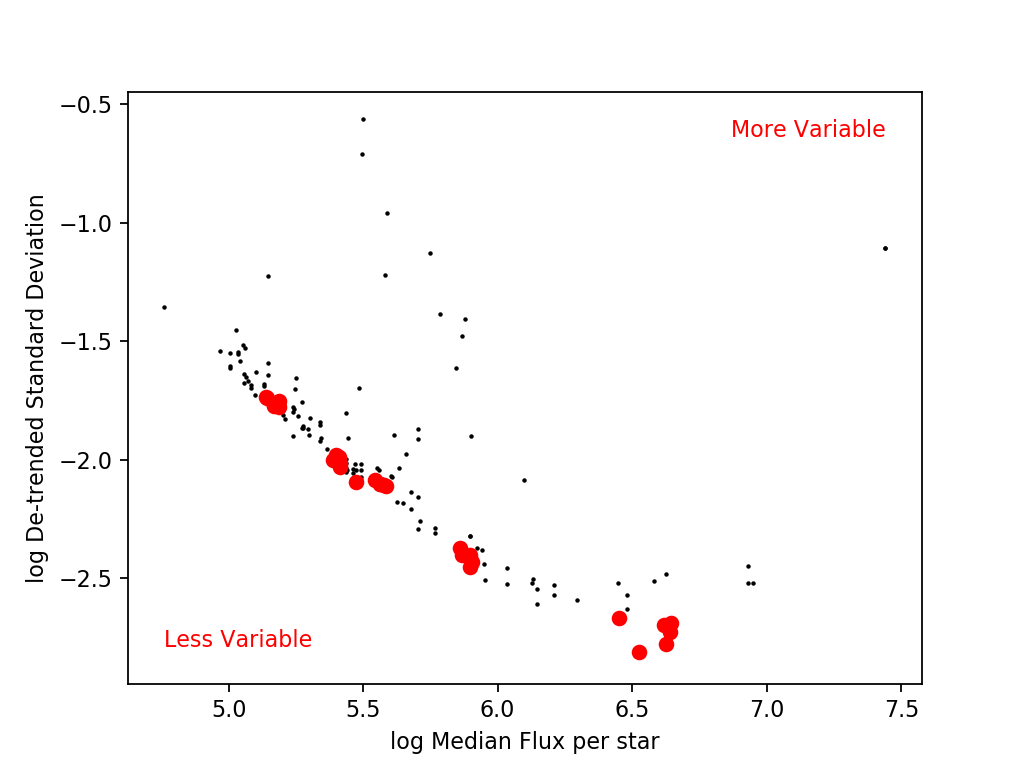

In [118]:
most_accurate = findComparisonStars(Photometry, cPhotometry) # comp_num= (can set this)



In [135]:
# dPhotometry, edPhotometry, tePhotometry  = runDifferentialPhotometry(Photometry, ePhotometry, nstars, most_accurate)

dPhotometry, edPhotometry, tePhotometry  = runDifferentialPhotometry(Photometry, ePhotometry, nstars, comparison_star_index)



[105998.60721476 113944.19484102 113513.63264941 116196.3367786
 113765.45564643 101060.66063227 106177.56982446 110549.73791313
 111948.04814523 108426.67197863]
running differential photometry on star:  0 / 149
[[105998.60721476 342011.32787924  50050.24257727 ... 719453.6575975
  717651.3214307  131431.4017631 ]
 [113944.19484102 347653.21180259  57517.88216971 ... 714809.78458096
  724980.61607162 136221.65495329]
 [113513.63264941 357591.33560771  56754.14849866 ... 808543.39538424
  759264.44724321 141358.67297342]
 ...
 [110778.96403297 346314.46818837  55611.76848341 ... 752865.7493616
  742031.0677507  140388.44842073]
 [112587.98461594 355168.71751965  58248.84225315 ... 793815.90255712
  743329.86136729 142626.56081008]
 [110438.72131629 335100.25116089  53962.4132154  ... 687776.5087648
  731204.69183214 131691.79629974]]


[array([97.63618294])]
[97.63681078]
[array([29.67252627])]
[29.67299207]
number of target stars: 1
index of target stars: [57]


<IPython.core.display.Javascript object>


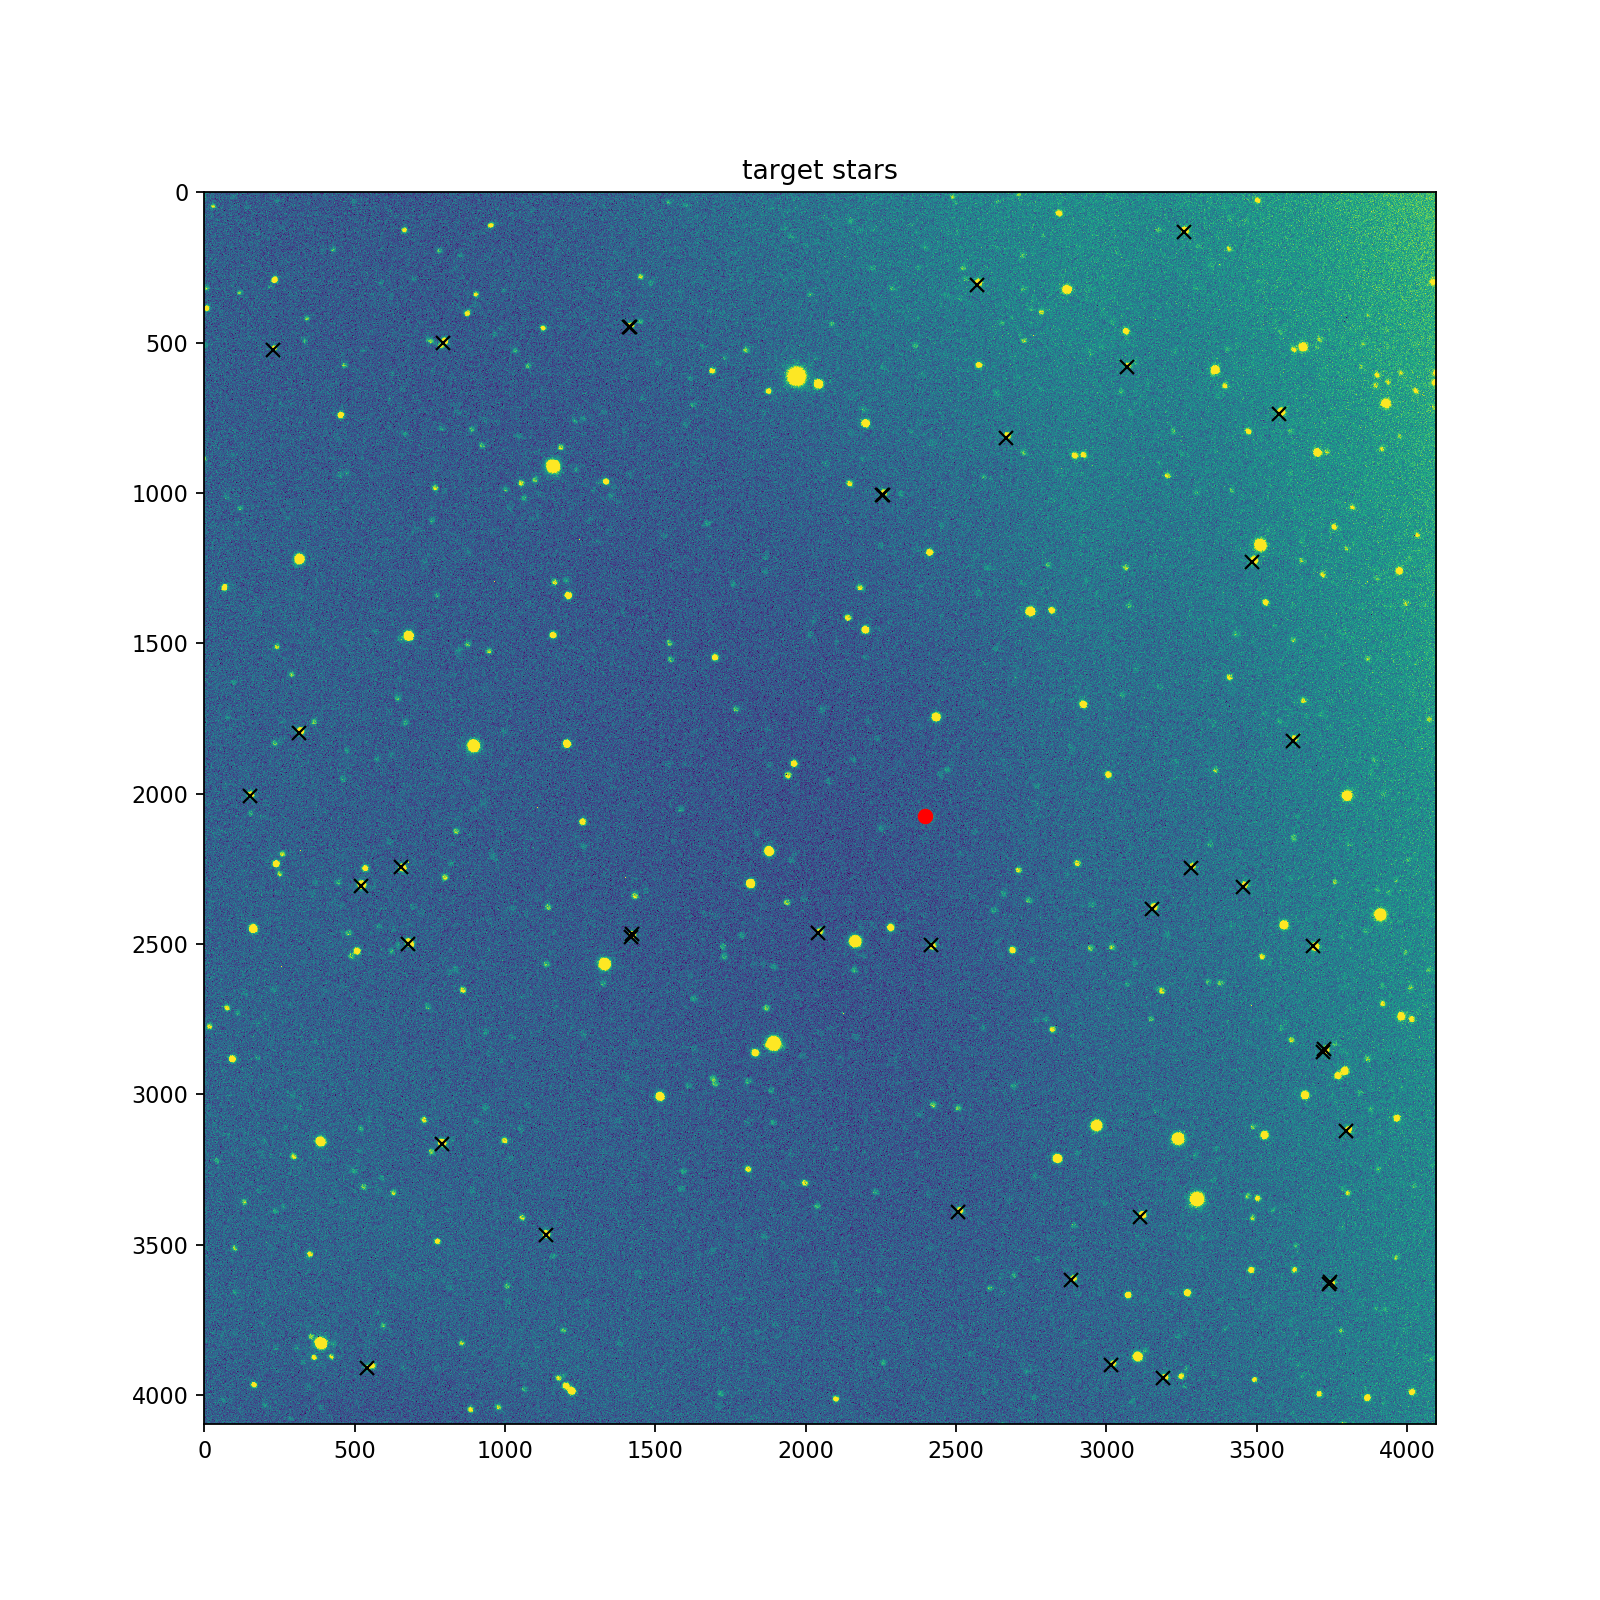

finished.  saving catalogue to: /Users/sarah/Downloads/WASP-12b/differentialPhot_fieldWASP12


(array([97.63681078]),
 array([29.67299207]),
 <Column name='xcentroid' dtype='float64' length=1>
 2397.895029937067,
 <Column name='ycentroid' dtype='float64' length=1>
 2072.641586594983,
 array([0.27858965, 0.04689098, 0.12688255, 0.19446074, 0.14894855,
        0.27307284, 0.21376862, 0.1186075 , 0.02758314, 0.29789788,
        0.09240398, 0.00137904, 0.06619905, 0.02068738, 0.3075519 ,
        0.10067863, 0.17791084, 0.24686836, 0.05378675, 0.26893549,
        0.14481117, 0.153086  , 0.21790601, 0.24962678, 0.17929009,
        0.22066431, 0.06206156, 0.0703366 , 0.02482486, 0.23997262,
        0.17101487, 0.00965428, 0.0841289 , 0.10343697, 0.01792902,
        0.31031013, 0.2027356 , 0.12964091, 0.28134794, 0.04413268,
        0.03585803, 0.28962272, 0.1103327 , 0.2110104 , 0.05930332,
        0.22893911, 0.18756507, 0.16825659, 0.23721435, 0.3144478 ,
        0.07861243, 0.10757448, 0.14205299, 0.26617728, 0.28824355,
        0.13653645, 0.25790182, 0.16136078, 0.2123895 , 0.0289

In [120]:
# memberlist = wcs_region

ra_in, dec_in = w.wcs_pix2world([2402],[2076],0)
memberlist = (ra_in, dec_in)



diffPhot_IndividualStars(datadir, memberlist, ra, dec, xpos, ypos, dPhotometry, edPhotometry, tePhotometry,times, target, wcs_image, comparison_star_index)





In [121]:
data2 = np.load(datadir + 'differentialPhot_field' + target + '.npz')


In [122]:
# What is an .npz file?
# your answer here:


data2.files
# print(data2['ra'])

['ra', 'dec', 'xpos', 'ypos', 'time', 'flux', 'fluxerr']

# Plot the lightcurve here!


<IPython.core.display.Javascript object>


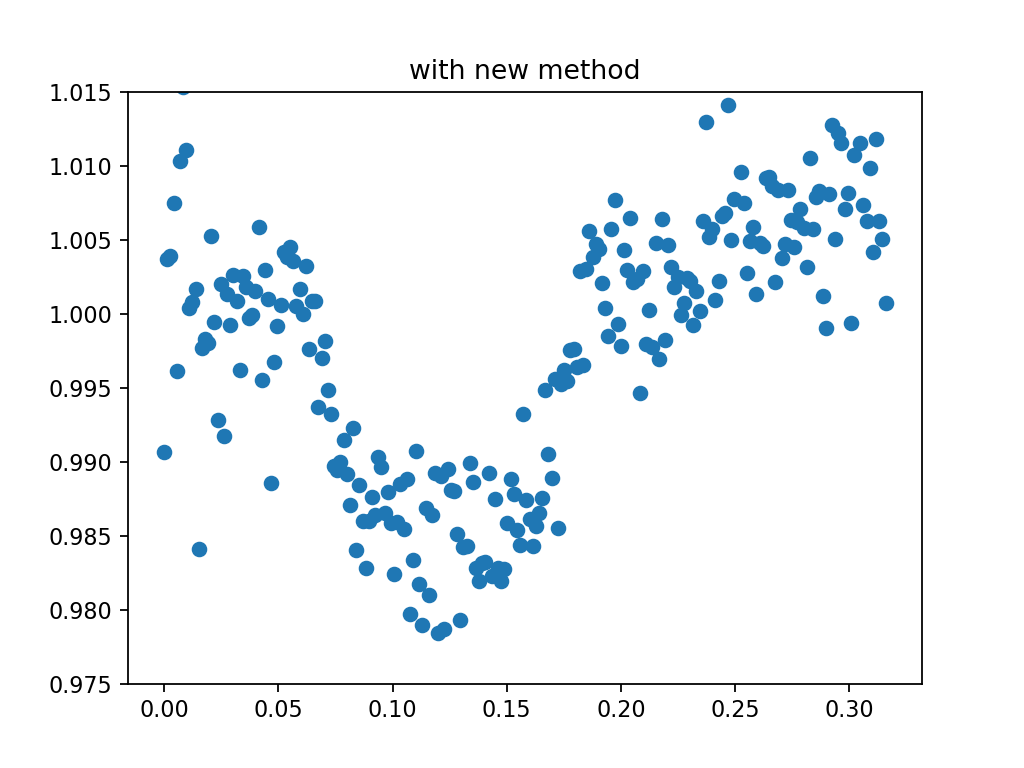

(0.975, 1.015)

In [123]:
# your code

plt.figure()
plt.plot(data2['time'], data2['flux'],'o')
plt.title("with new method")
plt.ylim(0.975, 1.015)